# Train set visualization (Chactun)


In [4]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 7.9 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import laspy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

ModuleNotFoundError: No module named 'laspy'

## Visualize a tile

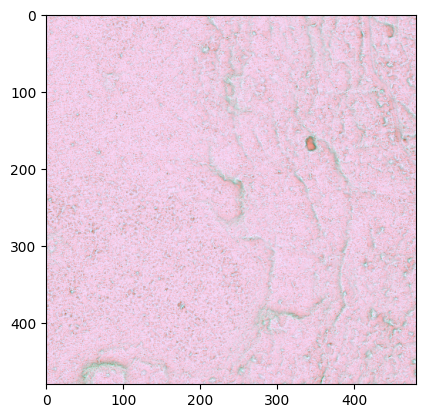

In [28]:
#Load tif file
path = 'raw_data/train_data/train_lidar/tile_0_lidar.tif'
img = cv2.imread(path)
plt.imshow(img)

## Visualize a tile and masks

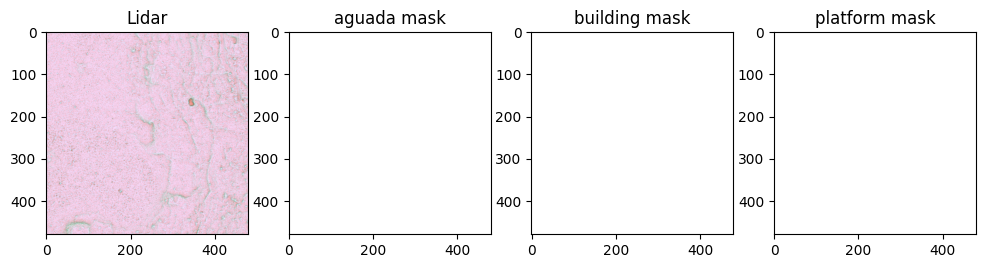

In [29]:
path_image = 'raw_data/train_data/train_lidar/tile_0_lidar.tif'
path_aguada = 'raw_data/train_data/train_masks/tile_0_mask_aguada.tif'
path_building = 'raw_data/train_data/train_masks/tile_0_mask_building.tif'
path_platform = 'raw_data/train_data/train_masks/tile_0_mask_platform.tif'

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

ax0.set_title('Lidar')
image = cv2.imread(path_image)
ax0.imshow(image)

ax1.set_title('aguada mask')
aguada = cv2.imread(path_aguada)
ax1.imshow(aguada)

ax2.set_title('building mask')
building = cv2.imread(path_building)
ax2.imshow(building)

ax3.set_title('platform mask')
platform = cv2.imread(path_platform)
ax3.imshow(platform)

## Create a function to visualize a tile and masks

In [30]:
def tile_viz(tile_number):
    path_image = f'raw_data/train_data/train_lidar/tile_{tile_number}_lidar.tif'
    path_aguada = f'raw_data/train_data/train_masks/tile_{tile_number}_mask_aguada.tif'
    path_building = f'raw_data/train_data/train_masks/tile_{tile_number}_mask_building.tif'
    path_platform = f'raw_data/train_data/train_masks/tile_{tile_number}_mask_platform.tif'

    fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

    ax0.set_title('Lidar')
    image = cv2.imread(path_image)
    ax0.imshow(image)

    ax1.set_title('aguada mask')
    aguada = cv2.imread(path_aguada)
    ax1.imshow(aguada)

    ax2.set_title('building mask')
    building = cv2.imread(path_building)
    ax2.imshow(building)

    ax3.set_title('platform mask')
    platform = cv2.imread(path_platform)
    ax3.imshow(platform)

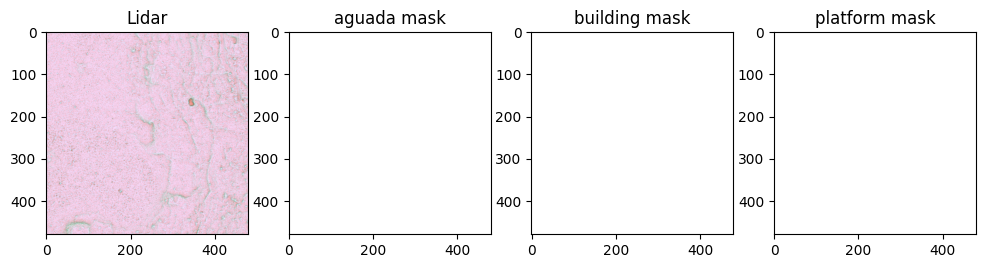

In [31]:
tile_viz(0)

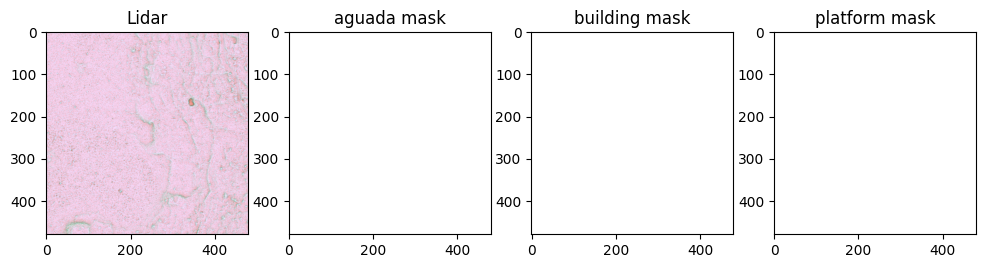

In [32]:
tile_viz(10)

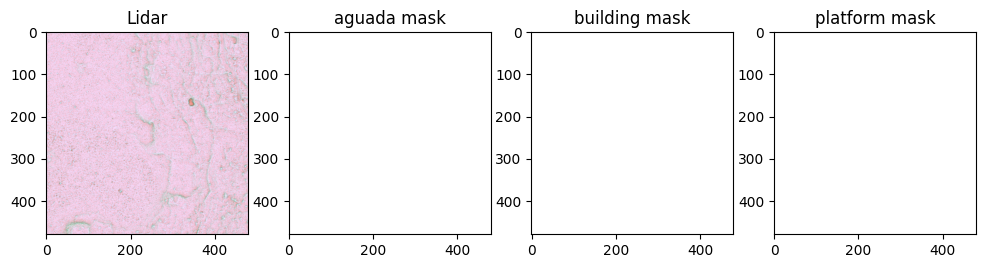

In [33]:
tile_viz(32)

## Visualize a bunch of tiles

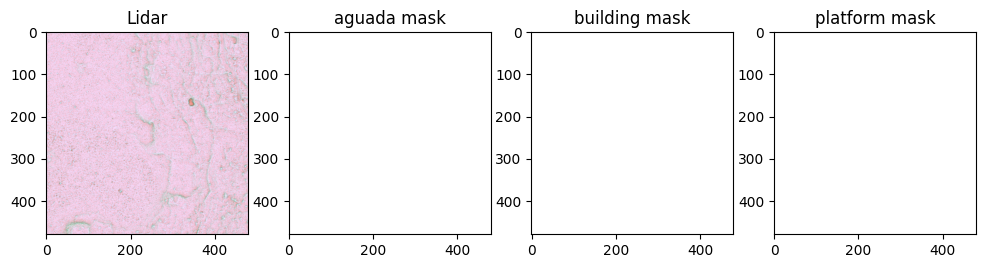

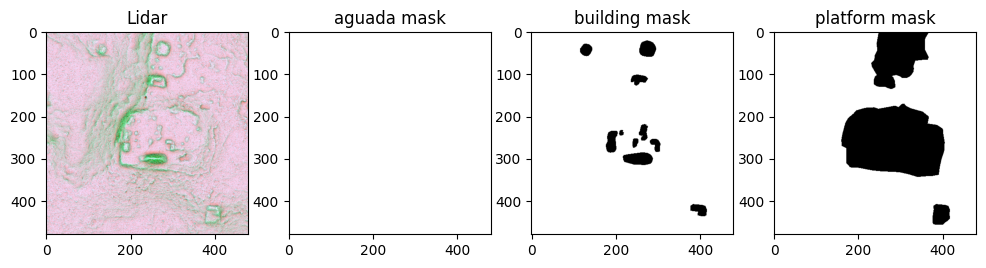

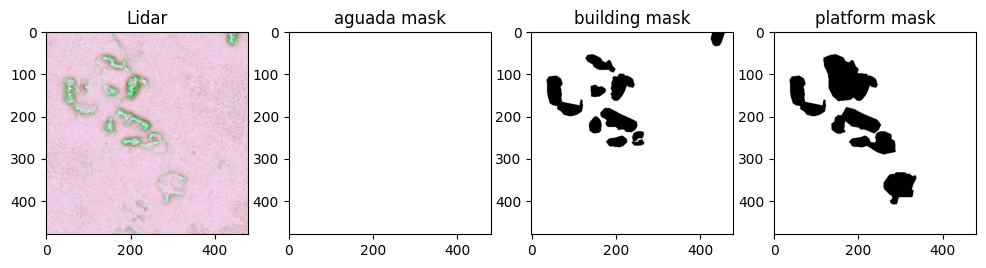

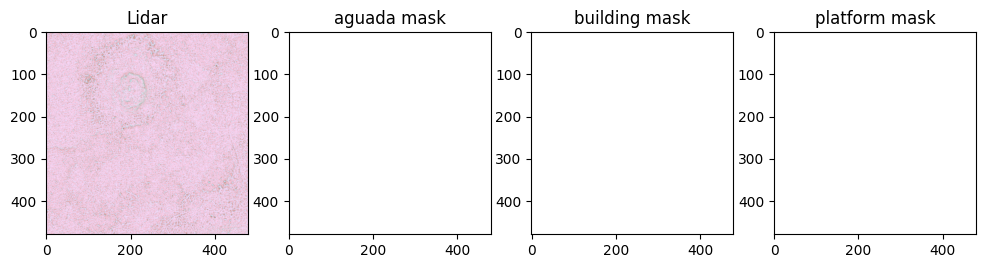

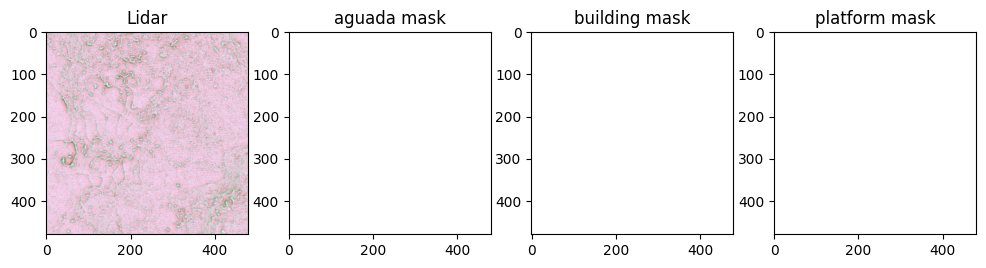

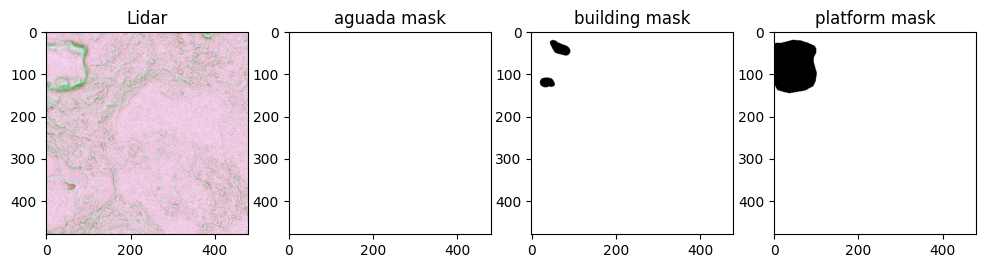

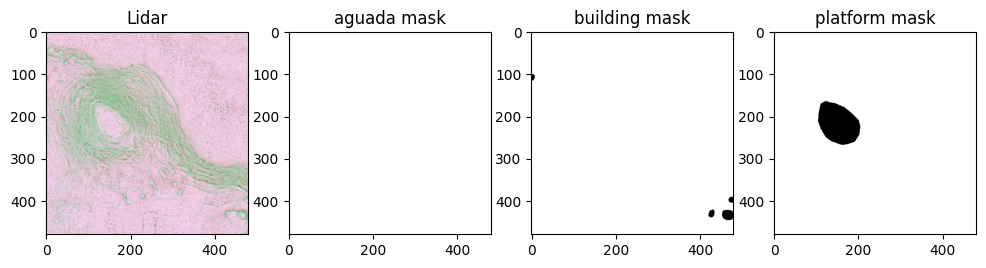

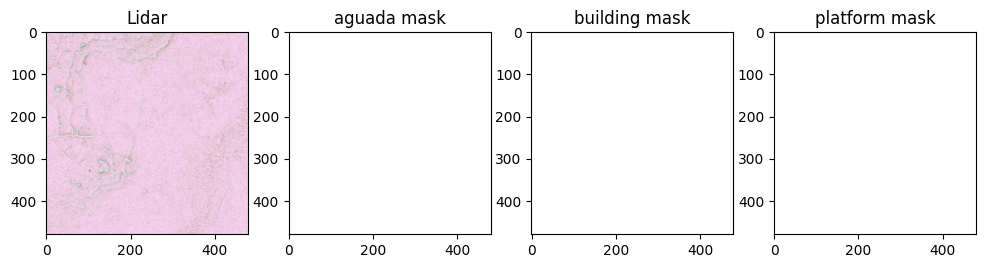

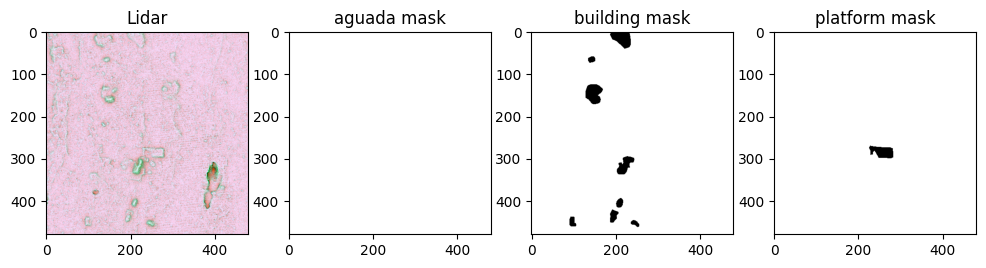

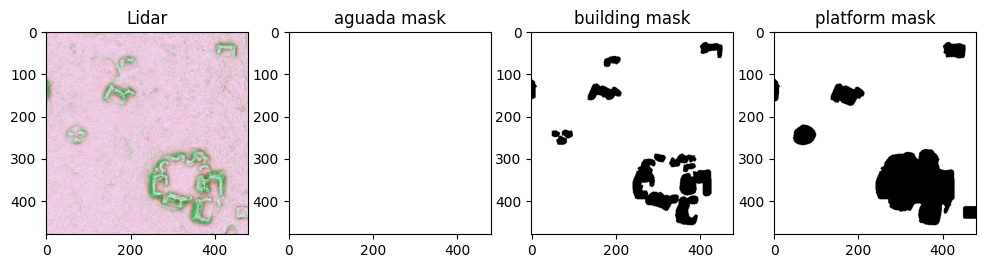

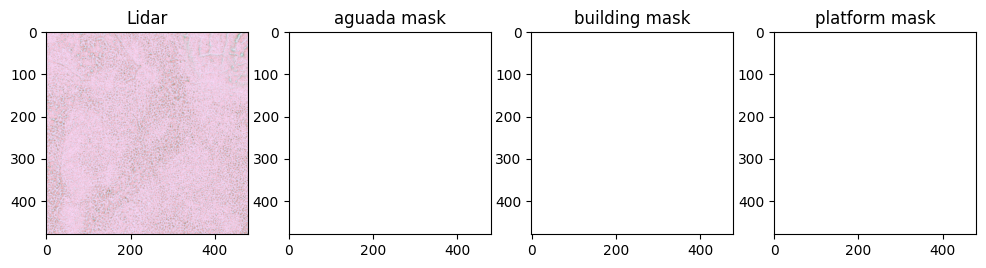

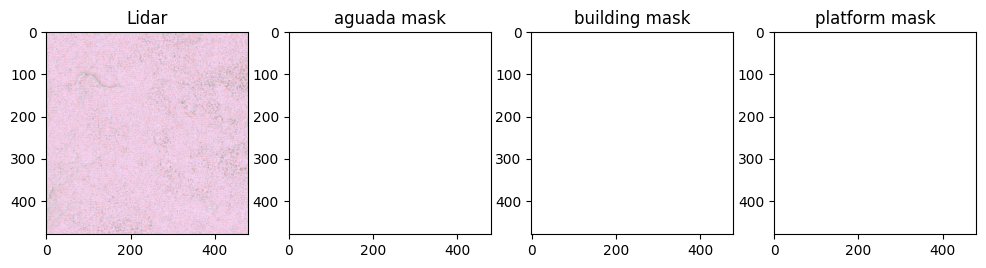

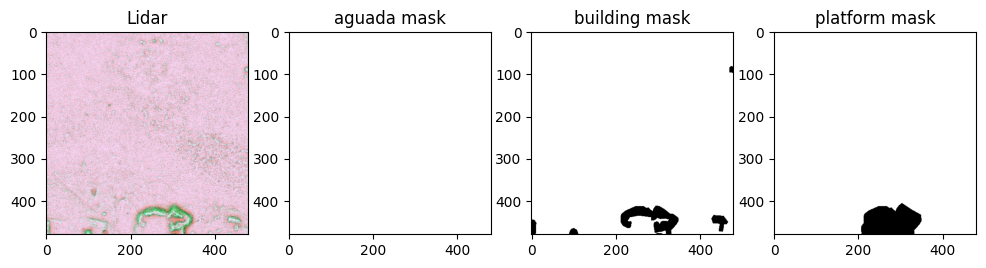

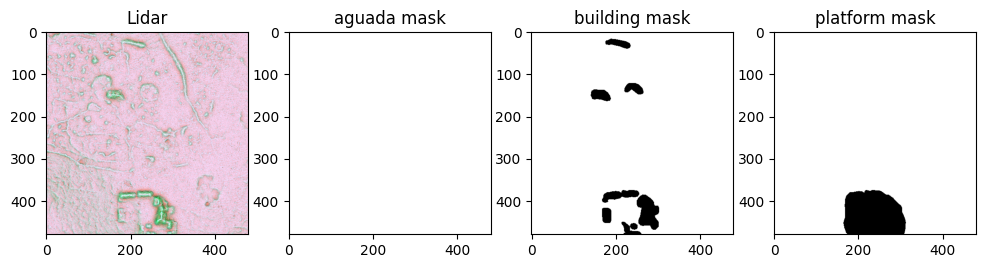

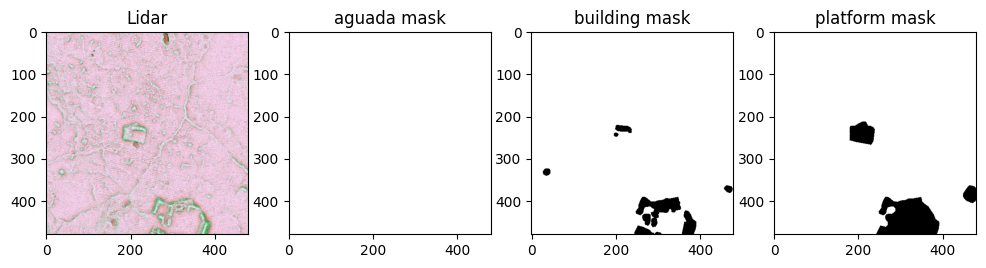

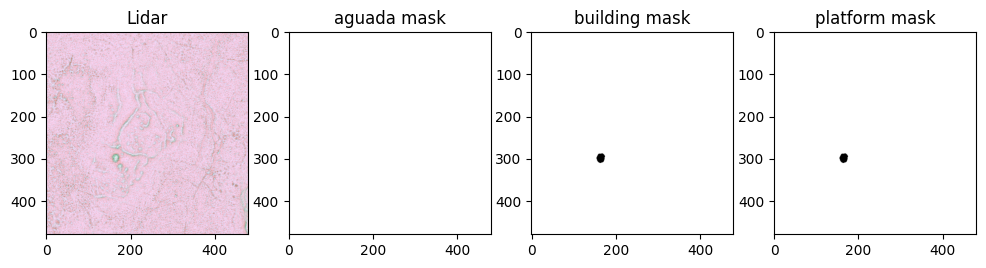

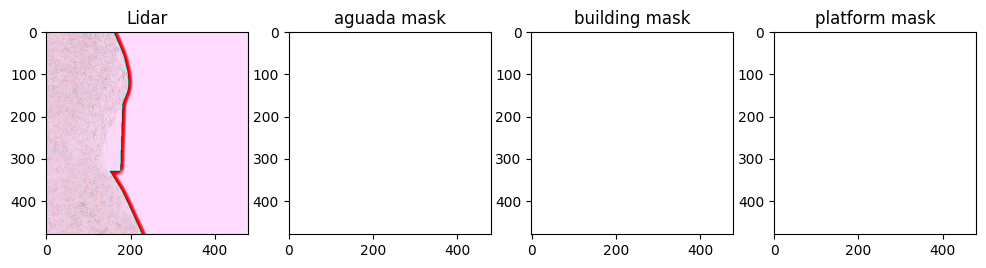

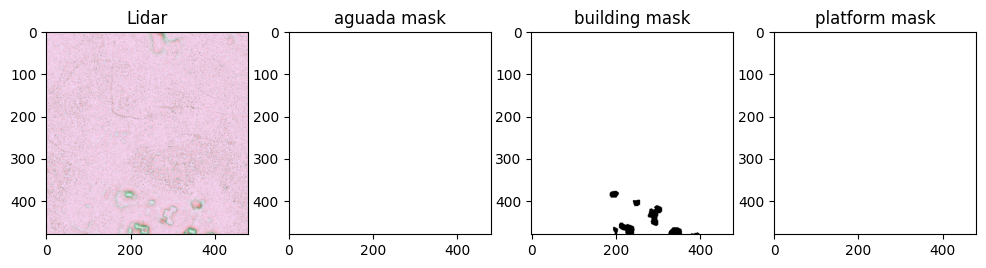

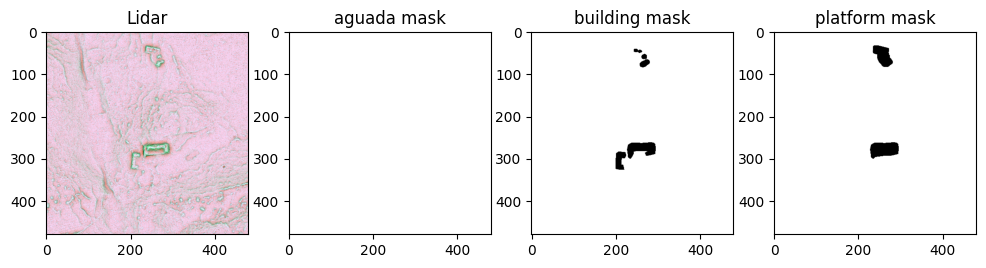

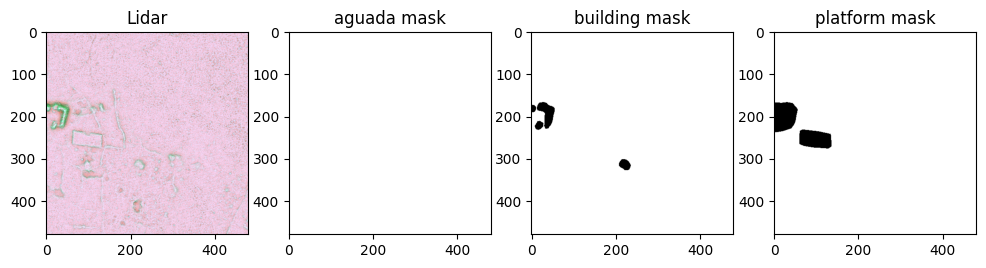

In [27]:
#Visualize 20 first tiles
for i in range(20):
    tile_viz(i)

# Data Augmentation

## Load the data

In [8]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

lidar_test_dir = '/home/arturobc1/code/flegoualher/maia/data/train_lidar'
mask_test_dir = '/home/arturobc1/code/flegoualher/maia/data/train_masks'

def load_data(lidar_dir, mask_dir, img_size=(128, 128)):
    lidar_images = []
    mask_images = {'aguada': [], 'building': [], 'platform': []}

    for file in os.listdir(lidar_dir):
        if file.endswith('.tif'):
            img_path = os.path.join(lidar_dir, file)
            img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img, img_size)
            lidar_images.append(img_resized)

    for file in os.listdir(mask_dir):
        if file.endswith('.tif'):
            parts = file.split('_')
            img_class = parts[3].split('.')[0]
            img_path = os.path.join(mask_dir, file)
            img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img, img_size)
            mask_images[img_class].append(img_resized)

    return np.array(lidar_images), {k: np.array(v) for k, v in mask_images.items()}


In [9]:
lidar_images, mask_images = load_data(lidar_test_dir, mask_test_dir, img_size=(128, 128))

## Do data augmentation function

In [10]:
def augment_data(lidar_images, mask_images):
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    datagen.fit(lidar_images)

    augmented_lidar_images = next(datagen.flow(lidar_images, batch_size=len(lidar_images), shuffle=False))
    augmented_mask_images = {k: next(datagen.flow(v, batch_size=len(v), shuffle=False)) for k, v in mask_images.items()}

    return augmented_lidar_images, augmented_mask_images

In [11]:
augmented_lidar_images, augmented_mask_images = augment_data(lidar_images, mask_images)

## Define a fuction to visualize augmentated images

In [14]:
def tile_viz(tile_number, lidar_images, mask_images, augmented_lidar_images, augmented_mask_images):
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

    axs[0, 0].set_title('Original LiDAR')
    axs[0, 0].imshow(lidar_images[tile_number] / 255.0)

    axs[1, 0].set_title('Augmented LiDAR')
    axs[1, 0].imshow(augmented_lidar_images[tile_number] / 255.0)

    for i, mask_name in enumerate(['aguada', 'building', 'platform']):
        axs[0, i+1].set_title(f'Original {mask_name.capitalize()} Mask')
        axs[0, i+1].imshow(mask_images[mask_name][tile_number] / 255.0)

        axs[1, i+1].set_title(f'Augmented {mask_name.capitalize()} Mask')
        axs[1, i+1].imshow(augmented_mask_images[mask_name][tile_number] / 255.0)

    plt.tight_layout()
    plt.show()

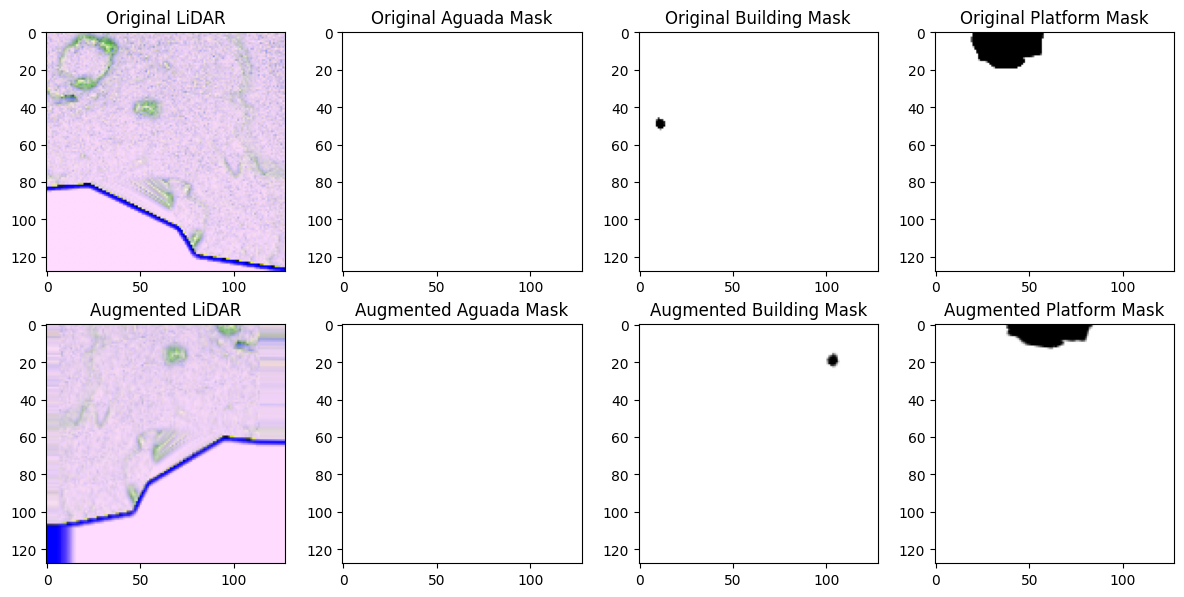

In [15]:
tile_viz(5, lidar_images, mask_images, augmented_lidar_images, augmented_mask_images)